In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=15)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [6]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [7]:
y_pred = logistic.predict(X_test)

In [8]:
logistic.predict_proba(X_test)

array([[9.33104089e-01, 6.68959106e-02],
       [6.59976832e-01, 3.40023168e-01],
       [8.65439561e-01, 1.34560439e-01],
       [9.59081747e-02, 9.04091825e-01],
       [2.43108150e-01, 7.56891850e-01],
       [5.76396931e-01, 4.23603069e-01],
       [8.25188888e-01, 1.74811112e-01],
       [2.29999952e-04, 9.99770000e-01],
       [1.25363187e-02, 9.87463681e-01],
       [2.73346597e-03, 9.97266534e-01],
       [7.06227890e-03, 9.92937721e-01],
       [5.68134296e-01, 4.31865704e-01],
       [8.38796778e-02, 9.16120322e-01],
       [9.73835584e-01, 2.61644162e-02],
       [1.27501162e-02, 9.87249884e-01],
       [8.06120072e-01, 1.93879928e-01],
       [9.95125747e-01, 4.87425270e-03],
       [1.78699988e-02, 9.82130001e-01],
       [9.78717701e-01, 2.12822989e-02],
       [3.90303620e-02, 9.60969638e-01],
       [3.39139480e-02, 9.66086052e-01],
       [3.13743686e-02, 9.68625631e-01],
       [5.00274883e-02, 9.49972512e-01],
       [8.18573651e-01, 1.81426349e-01],
       [8.590384

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9166666666666666
[[146  11]
 [ 14 129]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       157
           1       0.92      0.90      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



### Hyperparameter & CrossValidation

In [11]:
#Hyperparameter tuning
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

params = dict(penalty=penalty, C=c_values, solver=solver)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

In [13]:
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=cv)

In [14]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [15]:
grid.fit(X_train, y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [16]:
grid.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [17]:
grid.best_score_

0.9242857142857142

In [18]:
y_pred = grid.predict(X_test)

In [19]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.92
[[149   8]
 [ 16 127]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       157
           1       0.94      0.89      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



### Randomized SearchCV 

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
model = LogisticRegression()
randomcv = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5, scoring='accuracy')

In [22]:
randomcv.fit(X_train, y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [23]:
grid.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [24]:
grid.best_score_

0.9242857142857142

In [25]:
y_pred = grid.predict(X_test)

In [26]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.92
[[149   8]
 [ 16 127]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       157
           1       0.94      0.89      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



### Logistic Regression For Multiclass Classification Problem

In [30]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [31]:
X,y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_classes=3, 
                          random_state=15)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
logistic = LogisticRegression(multi_class='ovr')
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

In [32]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.79
[[84 10  8]
 [ 3 74 25]
 [10  7 79]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       102
           1       0.81      0.73      0.77       102
           2       0.71      0.82      0.76        96

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



### Logistic Regression for Imbalanced Dataset

In [33]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from collections import Counter
import seaborn as sns
import pandas as pd

In [34]:
X,y = make_classification(n_samples=10000, n_features=2, n_clusters_per_class=1,
                          n_redundant=0, weights=[0.99], random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
logistic = LogisticRegression(multi_class='ovr')
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

In [35]:
Counter(y)

Counter({0: 9846, 1: 154})

<Axes: xlabel='0', ylabel='1'>

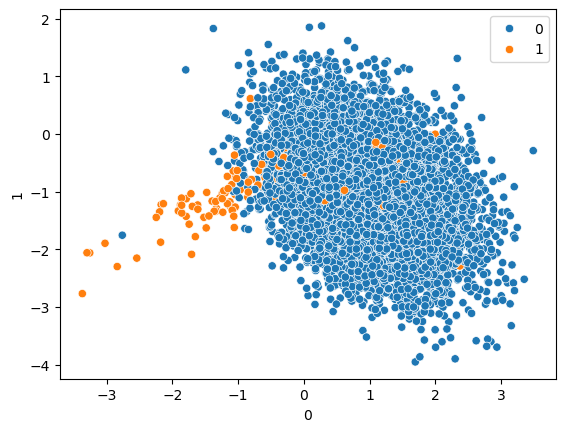

In [39]:
x_df,y_df = (pd.DataFrame(X)[0],pd.DataFrame(X)[1])

sns.scatterplot(x=x_df, y=y_df, hue=y)

In [40]:
Counter(y)

Counter({0: 9846, 1: 154})

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [44]:
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight = [{0:w, 1:y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]]

params = dict(penalty=penalty, C=c_values, class_weight=class_weight, solver=solver)

In [45]:
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=cv)

In [46]:
grid.fit(X_train, y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [47]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [48]:
grid.best_score_

0.9881333333333334

In [49]:
y_pred = grid.predict(X_test)

In [50]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.992
[[2468    2]
 [  18   12]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2470
           1       0.86      0.40      0.55        30

    accuracy                           0.99      2500
   macro avg       0.92      0.70      0.77      2500
weighted avg       0.99      0.99      0.99      2500



### Logistic Regression with ROC curve & ROC AUC score

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from matplotlib import pyplot

In [52]:
X,y = make_classification(n_samples=1000, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [53]:
dummy_model_prob = [0 for _ in range(len(y_test)) ]

In [54]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [55]:
model_prob = model.predict_proba(X_test)

In [56]:
model_prob = model_prob[:,1]

In [57]:
print(roc_auc_score(y_test, dummy_model_prob))
print(roc_auc_score(y_test, model_prob))

0.5
0.907648


### False Positive Rate

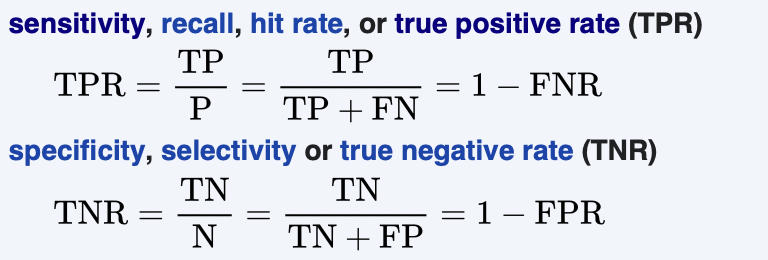

In [62]:
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

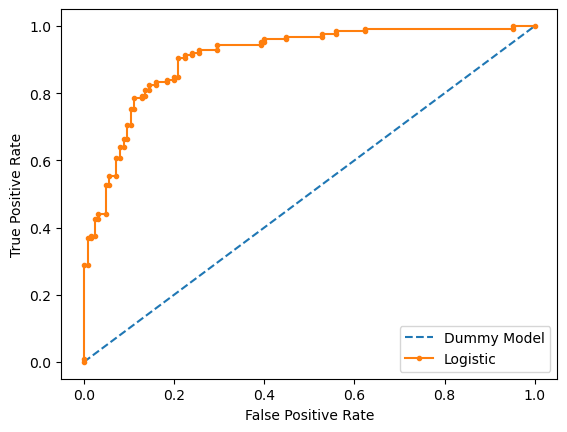

In [64]:
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

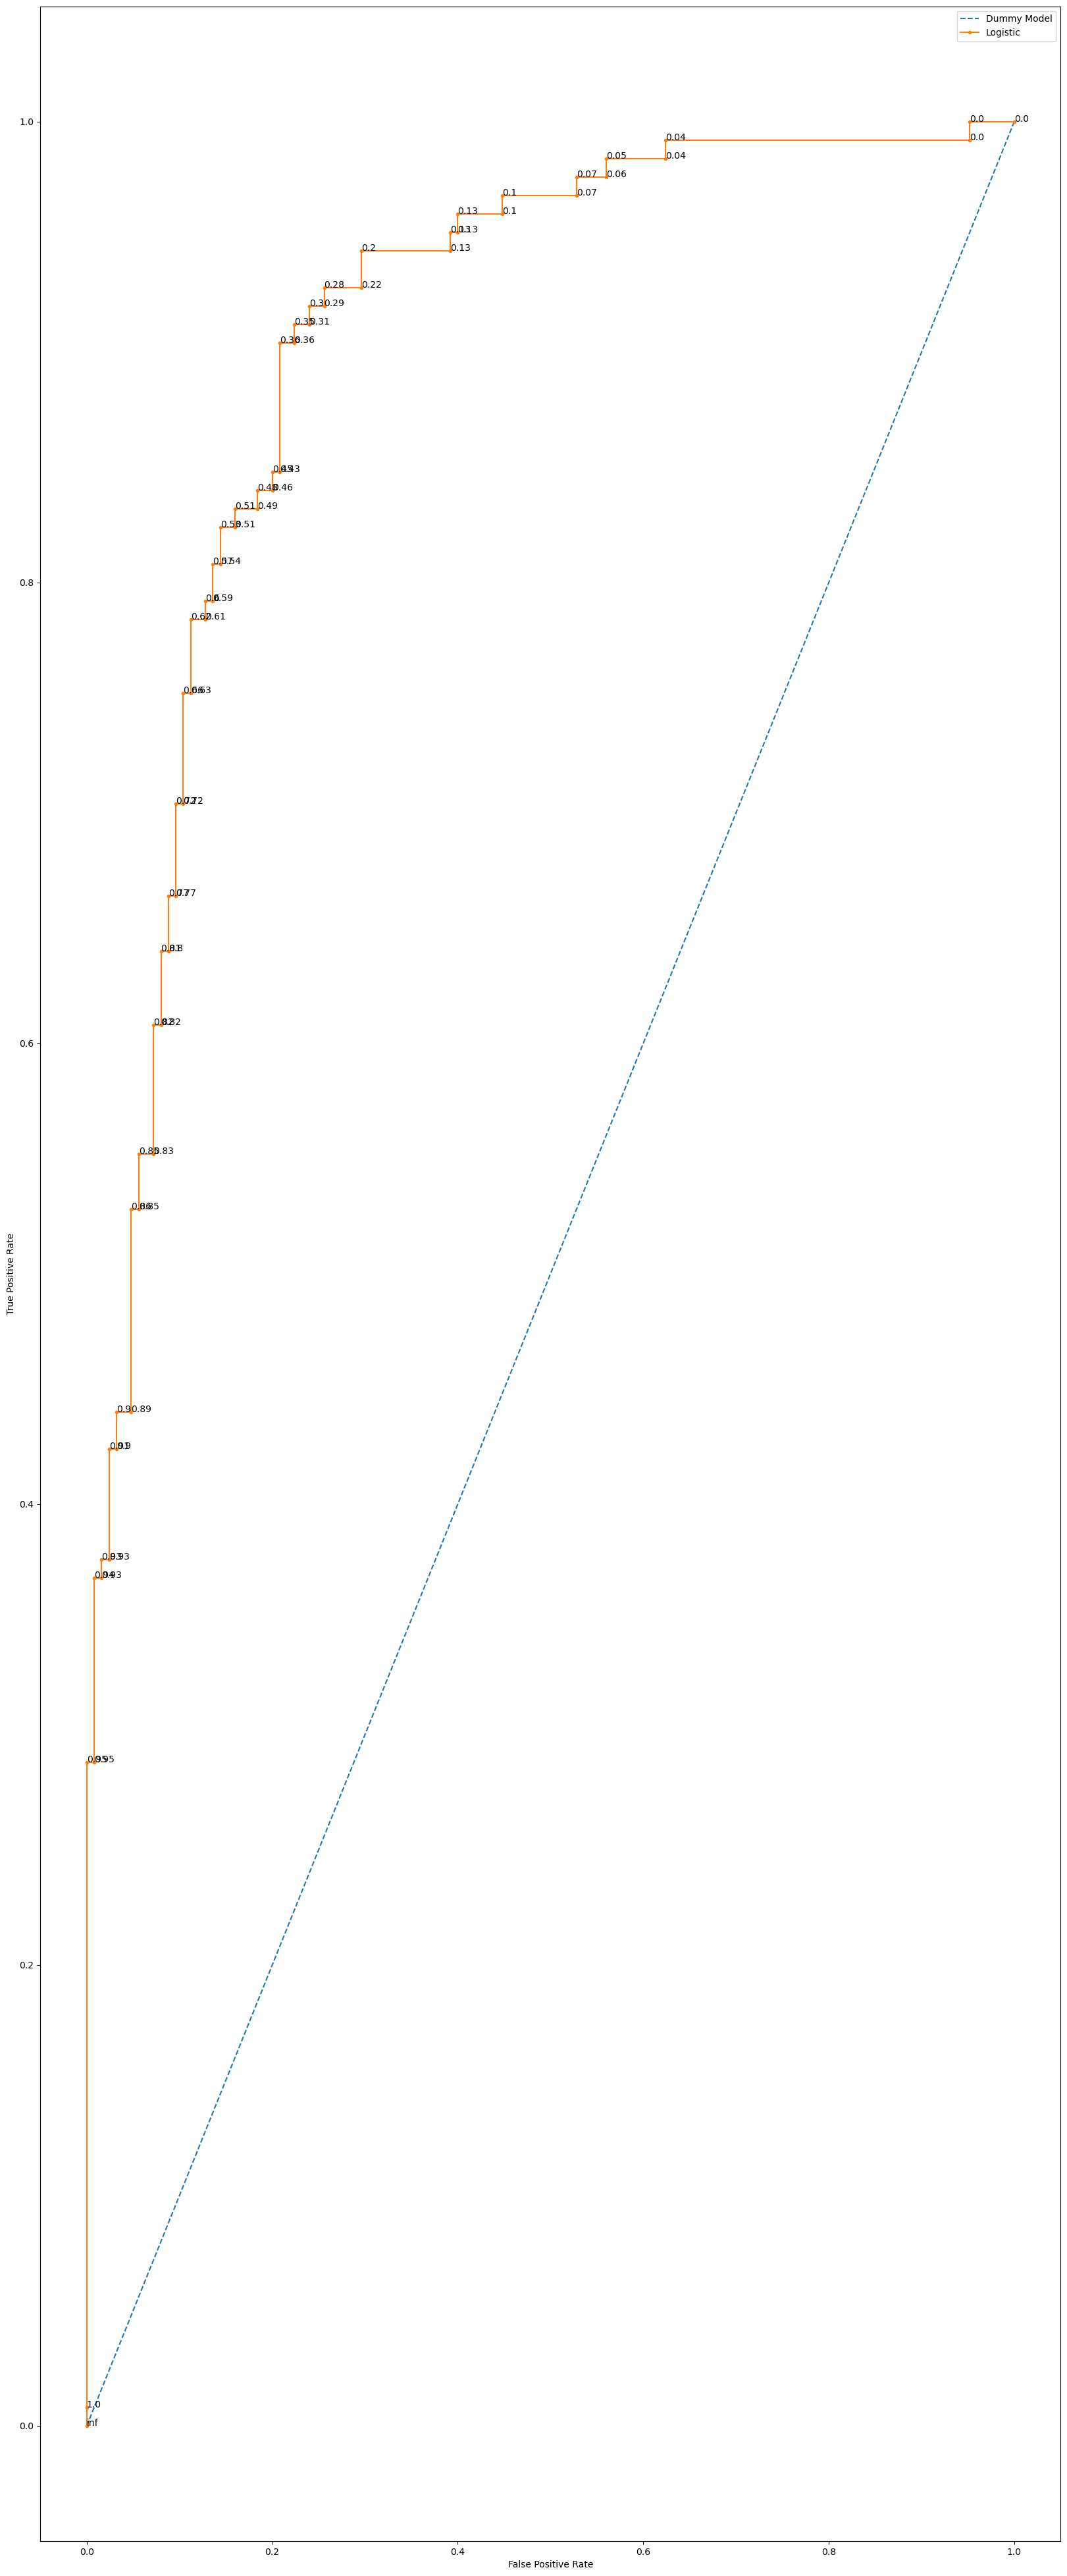

In [66]:
import numpy as np

fig = pyplot.figure(figsize=(20,50))
ax = fig.add_subplot(111)
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')

for xyz in zip(model_fpr, model_tpr, thresholds):
    ax.annotate('%s' % np.round(xyz[2], 2), xy=(xyz[0], xyz[1]))
    
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()
pyplot.show()